# Drawdown Distribution

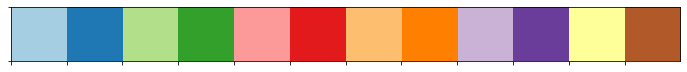

In [6]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

colors = sns.color_palette("Paired")

sns.palplot(colors)

In [7]:
def cal_underwater(rets):

    cum_rets = (rets + 1).cumprod()
    underwater = cum_rets / np.maximum.accumulate(cum_rets) - 1

    return underwater

def cal_maximum_dd(rets):
    underwater = cal_underwater(rets)
    return underwater.values.min()

In [8]:
returns = pd.read_csv('returns.csv', index_col=0, parse_dates=True)

# returns.to_csv('returns.csv')
returns.index

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16',
               ...
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', name='date', length=968, freq=None)

In [9]:
bnd_date = datetime.datetime(2019, 9, 30)
bt_returns = returns.loc[:bnd_date]
ft_returns = returns.loc[bnd_date + datetime.timedelta(days=1):]


monthly_dd = bt_returns.rolling(22).apply(lambda x: cal_underwater(x).min()).dropna().values
# monthly_dd = bt_returns.groupby(pd.Grouper(freq='M')).apply(cal_maximum_dd)
# monthly_dd = np.random.choice(monthly_dd, size=20000, replace=True)

In [10]:
curr_dd = cal_maximum_dd(ft_returns)
soft_dd = np.quantile(monthly_dd, 0.10)
hard_dd = np.quantile(monthly_dd, 0.02)
tail_pct = (monthly_dd < curr_dd).mean()

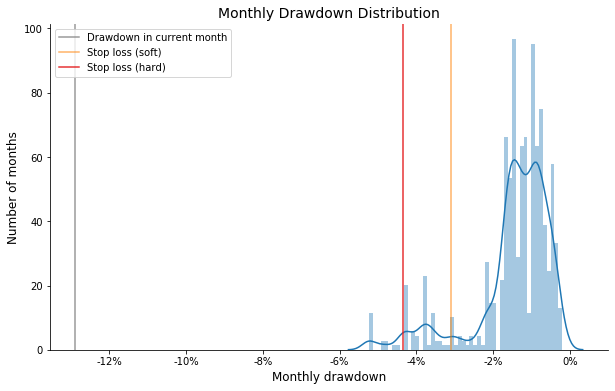

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.distplot(monthly_dd, bins=50)

ax.axvline(x=curr_dd, color="grey", alpha=0.8, label="Drawdown in current month")
ax.axvline(x=soft_dd, color=colors[7], alpha=0.6, label="Stop loss (soft)")
ax.axvline(x=hard_dd, color=colors[5], alpha=0.9, label="Stop loss (hard)")
# ax.text(x = 2.5 * curr_dd, y = 10, s = f'{tail_pct:.2%}', fontsize=12)
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Monthly Drawdown Distribution", fontsize=14)
ax.set_xlabel("Monthly drawdown", fontsize=12);
ax.set_ylabel("Number of months", fontsize=12);
ax.legend()

In [ ]:
fig.savefig("drawdown_distribution.jpg", dpi=600)